In [1]:
import numpy as np
import matplotlib.pyplot as plt
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[138:150])

[[  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]
 [  140.          35.369253   138.727674  3567.76     45110.      ]
 [  141.          35.370928   138.724777  3348.43     45432.      ]
 [  142.          35.372602   138.72188   3171.53     45754.      ]
 [  143.          35.374277   138.718982  3019.8      46077.      ]
 [  144.          35.375951   138.716085  2864.56     46399.      ]
 [  145.          35.377625   138.713188  2713.03     46721.      ]
 [  146.          35.379299   138.71029   2566.6      47043.      ]
 [  147.          35.380973   138.707392  2450.23     47366.      ]
 [  148.          35.382647   138.704494  2334.42     47688.      ]
 [  149.          35.384321   138.701596  2240.98     48010.      ]]


# [Problem 1] Visualization of data

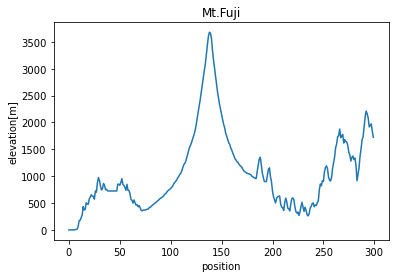

In [3]:
#plt.figure(figsize=(5, 3), dpi=100)
plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

plt.show()

# [Problem 2] Create a function to calculate the slope of a point

In [4]:
def compute_gradient(position, elevation):
    """
    Calculate a slope at a certain position
    parameters
    ----------------
    positon: int
        current position
    elevations: ndarray
        Array of n elements, which is Fuji's elavation
    returns
    ----------------
    the slope at that position
    """
    return elevation[position] - elevation[position-1] 

In [5]:
position = 136
elevation = fuji[:, 3]
print('At position {} has slope {}'.format(position, compute_gradient(position, elevation)))

At position 136 has slope 168.35000000000036


# [Problem 3] Create a function to calculate the destination

Destination point = current location- α × Gradient at the current location

In [6]:
def calculate_next_position(position, elevation, alpha=0.1):
    """
    function that calculates the next destination based on the information on the slope of the current location.

    paramaters
    ----------------
    positon: int
        current position
    elevation: ndarray
        Array of n elements, which is Fuji's elavation
    alpha: float or int (default=0.2)
        hyper-parameters

    returns
    ----------------
    next_point: int
        next position
    """
    next_point = None
    try:
        next_point = position - (alpha * compute_gradient(position, elevation))
        next_point = None if next_point<0 else min(len(elevation), next_point) 
        next_point = int(next_point)
    except:
        print('Exception thows: Current position is out of range')
    return next_point


In [7]:
position = 136
next_point = calculate_next_position(position, elevation)
print('The next point at {} will be {}'.format(position, next_point))

The next point at 136 will be 119


# [Problem 4] Creating a function to go down the mountain

In [8]:
def go_down_mountain(position, elevation, alpha=0.1):
    """
    function to calculate the way to go down the mountain

    paramaters
    --------------- 
    position : int
        The initial position which is recorded

    returns 
    ----------------
    process : list
        list of next point from the inital position
    ---------------
    """
    move_list =  [position]
    while move_list[-1] not in move_list[:-1]:
        move_list.append(calculate_next_position(move_list[-1], elevation, alpha))
    return move_list

In [9]:
position = 136

move_list = go_down_mountain(position, elevation)

print('From position={}, continue to move to {}'.format(position, move_list))

From position=136, continue to move to [136, 119, 113, 107, 102, 99, 97, 94, 91, 89, 86, 84, 82, 80, 79, 76, 75, 74, 73, 71, 75]


# [Problem 5] Visualization of the descent process

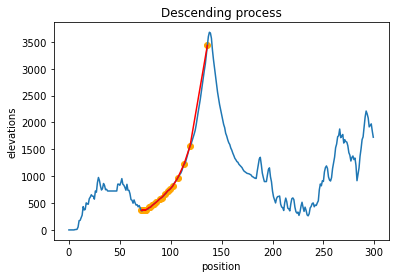

In [10]:
elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show()  

# [Problem 6] Change of initial value

From position=142, continue to move to [142, 159, 165, 168, 170, 172, 174, 175, 176, 176]


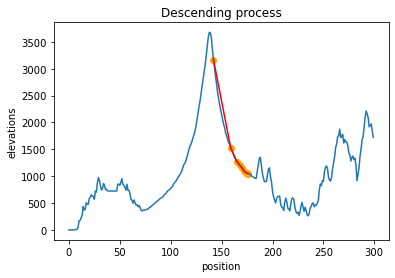

In [11]:
position = 142

move_list = go_down_mountain(position, elevation)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show()  

From position=200, continue to move to [200, 217, 220, 218, 204, 195, 182, 183, 184, 184]


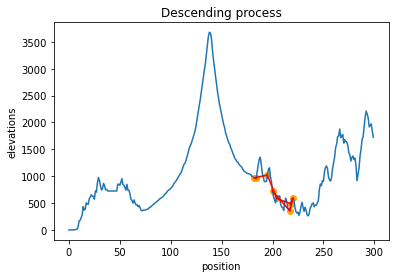

In [12]:
position = 200

move_list = go_down_mountain(position, elevation)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show()  

From position=255, continue to move to [255, 270, 286, 264, 250, 251, 233, 239, 233]


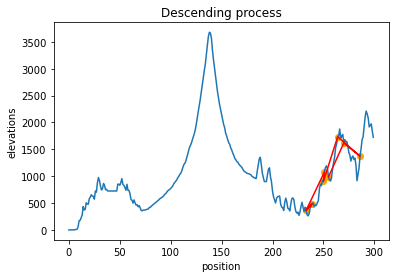

In [13]:
position = 255

move_list = go_down_mountain(position, elevation)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show()  

# [Problem 7] Change of learning rate (hyperparameters)

From position=255, continue to move to [255, 286, 242, 235, 238, 232, 216, 218, 191, 207, 205, 198, 231, 246, 204, 187, 163, 173, 175, 177, 178, 180, 185, 157, 168, 172, 177]


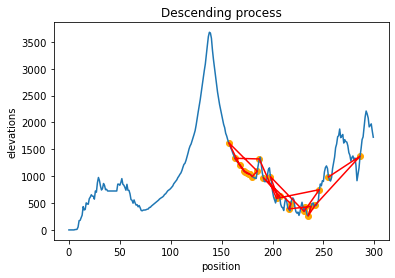

In [14]:
#When I change alpha=0.2. It varies too much!
alpha = 0.2
position = 255

move_list = go_down_mountain(position, elevation, alpha)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show()  

From position=142, continue to move to [142, 177, 178, 180, 185, 157, 168, 172, 177]


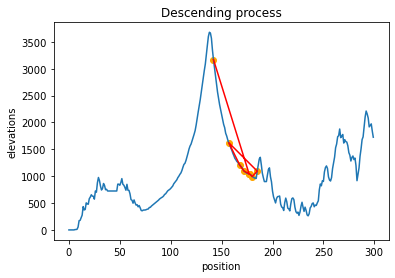

In [20]:
position = 142
alpha = 0.2

move_list = go_down_mountain(position, elevation, alpha)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show() 

From position=142, continue to move to [142, 203, 221, 232, 204, 174, 178, 181, 183, 186, 147, 187, 146, 196, 159, 181]


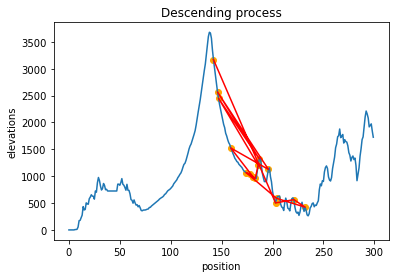

In [32]:
position = 142
alpha = 0.348

move_list = go_down_mountain(position, elevation, alpha)

print('From position={}, continue to move to {}'.format(position, move_list))

elevation_list = elevation[move_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(move_list, elevation_list, color='orange')
plt.plot(move_list, elevation_list, color='red')
plt.show() 

Increase the alpha to 0.348. Which is significantly affect the move. I try to increase the alpha more than that. Exception will occur